---
# Objective: <font color = "gray"> To perform a structured way of doing EDA
---

# Overview of the notebook

1. Introduction to problem Statement
2. Hypothesis generation with respect to problem statement
3. Importing neccessary libraries
4. Loading Dataset
5. Variable Identification and Typecasting
6. Uni-variate Analysis: Numerical Variables
7. Uni-variate Analysis: Categorical Variables
8. Uni-variate Analysis: Missing Values
9. Uni-variate Analysis: Outliers
10. Summary of Uni-variate Analysis
11. Bi-variate Analysis: Categorical - Categorical
12. Bi-variate Analysis: Numerical - Categorical
13. Bi-variate Analysis: Missing Value
14. Summary of Bi-variate Analysis

Topics to be covered in the succeeding Notebook

# <font color = black>1. Introduction to Problem Statement</font>

A client of a large MNC have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. The company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. We have been given the employees information such as department, length of service, average training score, previous year ratining, etc.

<font color = blue> Our goal is to predict the employees who are elgible for the promotion and to sort them in a order such that the most eligible employee comes first. </font>

---
# 2. Hypothesis Generation

**Hypothesis generation is a process of generating exhaustive list of questions which could directly or indirectly affect the problem statement or the target variable. It helps us to give adirection while performing EDA and prevents us from doing unneccessary deep EDA.**

<font color = red> This step is performed before looking/gathering dataset </font>

To generate hypothesis, we require the following:

1. Common Sense or Rationality
2. Domain knowledge if possible
3. Communication with domain experts

The hypothesis we generated according to the problem statement were over 30. I have sorted down the hypothesis according to the availabilty of the data.
- **Performance Based**
    - Better performance rating increases the chance of promotion.
    - Better training score increases the chance of promotion.
    - Award(s) won increases the chance of promotion.
    - Education Qualification increases the chance of promotion.
    - Number of trainings completed increases the chance of promotion.

- **Other**
    - Employees joining the organization with recommendation may get more promotion
    - Years of experience increase the chances of promotion
    - Employees of certain departments have better chance of promotion than others

These are some hypthesis which we will test in the Exploratory Data Analysis (EDA) part of this notebook. 

<font color = blue> Also we will generate some new hypothesis as we explore the dataset and test them. </font>

---
# 3. Importing Libraries

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

---
# 4. Loading Dataset

In [3]:
#importing dataset
df = pd.read_csv("train.csv")

In [4]:
#head of dataset i.e. first 5 rows
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
#tail for the dataset i.e. last 5 rows
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


This shows that data is loaded successfully.

### Variables Description

| Variable             	| Definition                                                                             	|
|----------------------	|----------------------------------------------------------------------------------------	|
| employee_id          	| Unique ID for employee                                                                 	|
| department           	| Department of employee                                                                 	|
| region               	| Region of employment (unordered)                                                       	|
| education            	| Education Level                                                                        	|
| gender               	| Gender of Employee                                                                     	|
| recruitment_channel  	| Channel of recruitment for employee                                                    	|
| no_of_trainings      	| no of other trainings completed in previous year on soft skills, technical skills etc. 	|
| age                  	| Age of Employee                                                                        	|
| previous_year_rating 	| Employee Rating for the previous year                                                  	|
| length_of_service    	| Length of service in years                                                             	|
| KPIs_met >80%        	| if Percent of KPIs(Key performance Indicators) >80% then 1 else 0                      	|
| awards_won?          	| if awards won during previous year then 1 else 0                                       	|
| avg_training_score   	| Average score in current training evaluations                                          	|
| is_promoted          	| (Target) Recommended for promotion                                                     	|

In [6]:
#shape of the datset
df.shape

(54808, 14)

**This shows that we have total 14 variables in the dataset including dependent variable `is_promoted` and we have records of total 54808 employees.**

---
# 5. Variable Identification and Typecasting

In [7]:
#lets look at the datatypes of the variables
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

**Pandas is not able to recogaize the variable type for many variables, so we will do it manually.**

In [8]:
#converting datatypes to categorical
df[["department","region","education","gender","recruitment_channel","no_of_trainings","previous_year_rating","KPIs_met >80%",\
    "awards_won?","is_promoted"]] = df[["department","region","education","gender","recruitment_channel","no_of_trainings",\
                                        "previous_year_rating","KPIs_met >80%","awards_won?","is_promoted"]].astype("category")

df.dtypes

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings         category
age                        int64
previous_year_rating    category
length_of_service          int64
KPIs_met >80%           category
awards_won?             category
avg_training_score         int64
is_promoted             category
dtype: object

**Now we have successfully converted data types of desired varibales.**

In [9]:
#droping employee_id column

df1 = df.copy()
df1.drop(columns="employee_id",inplace=True)
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


We have dropped employee id successfully as it will be not be helpful for any analysis and model building process.

### Grouping Variables

I have done grouping of variables according to their nature and data types, it is helpful when we need to study certian types of variables together.

In [10]:
#making groups among all variable for easy analysis
personal = ["education","gender","age"]
office = ["department","region","recruitment_channel"]
performance = ["no_of_trainings","previous_year_rating","length_of_service","KPIs_met >80%","awards_won?","avg_training_score"]

categorical = ["region","department","recruitment_channel","education","gender","previous_year_rating","KPIs_met >80%",\
               "awards_won?","no_of_trainings"]
numerical = ["length_of_service","avg_training_score","age"]

## Variable Types

#### <font color = blue> Categorical (10): </font>
- **Nominal (5):** `department`, `region`, `gender`, `recruitment_channel`, `is_promoted` (Target)
- **Ordinal (5):** `education`, `previous_year_rating`, `KPIs_met >80%`, `awards_won?`, `no_of_trainings`

#### <font color = green> Numerical (3): </font>
`age`, `length_of_service`, `avg_training_score`

In [11]:
#replacing values of region column from region_n to n, it will be easier to see names in plots
df1["region"] = df1["region"].str.replace("region_","")
df1["region"] = df1["region"].astype("category")
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


---
# <font color = "blue"> Exploratory Data Analysis (EDA)

Exploratory Data Analysis in short called as EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. You can click here to [read more](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

There are several types of analysis we can do under EDA like
1. Uni-variate Analysis
2. Bi-variate Analysis
3. Multi-variate Analysis

# 6. Uni-variate Analysis : Numerical Variables

Uni-variate Analysis is perhaps the simplest form of statistical analysis. The key fact is that only one variable is involved. You can click here to [read more](https://en.wikipedia.org/wiki/Univariate_analysis)

When dealing with numerical variables, we have to check their properties like:

- Mean
- Median
- Standard Deviation
- Kurtosis/skewness
- Distribution/range

In [12]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    """
      Univariate_Analysis_numeric
      takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

      Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    """
    size = len(var_group)
    rows = int(size/3) + 1
    plt.figure(figsize = (15,4*rows), dpi = 500)
  
  #looping for each variable
    for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
             # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(rows,3,j+1)
        sns.kdeplot(data[i], shade=True) #hist = False,color = "pink", 
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
        sns.scatterplot([mean], [0], color = 'red', label = "mean")
        sns.scatterplot([median], [0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'\
                  .format((round(points[0],2),round(points[1],2)),round(kurt,2),round(skew,2), \
                          (round(mini,2),round(maxi,2),round(ran,2)),round(mean,2), round(median,2)),size=12)


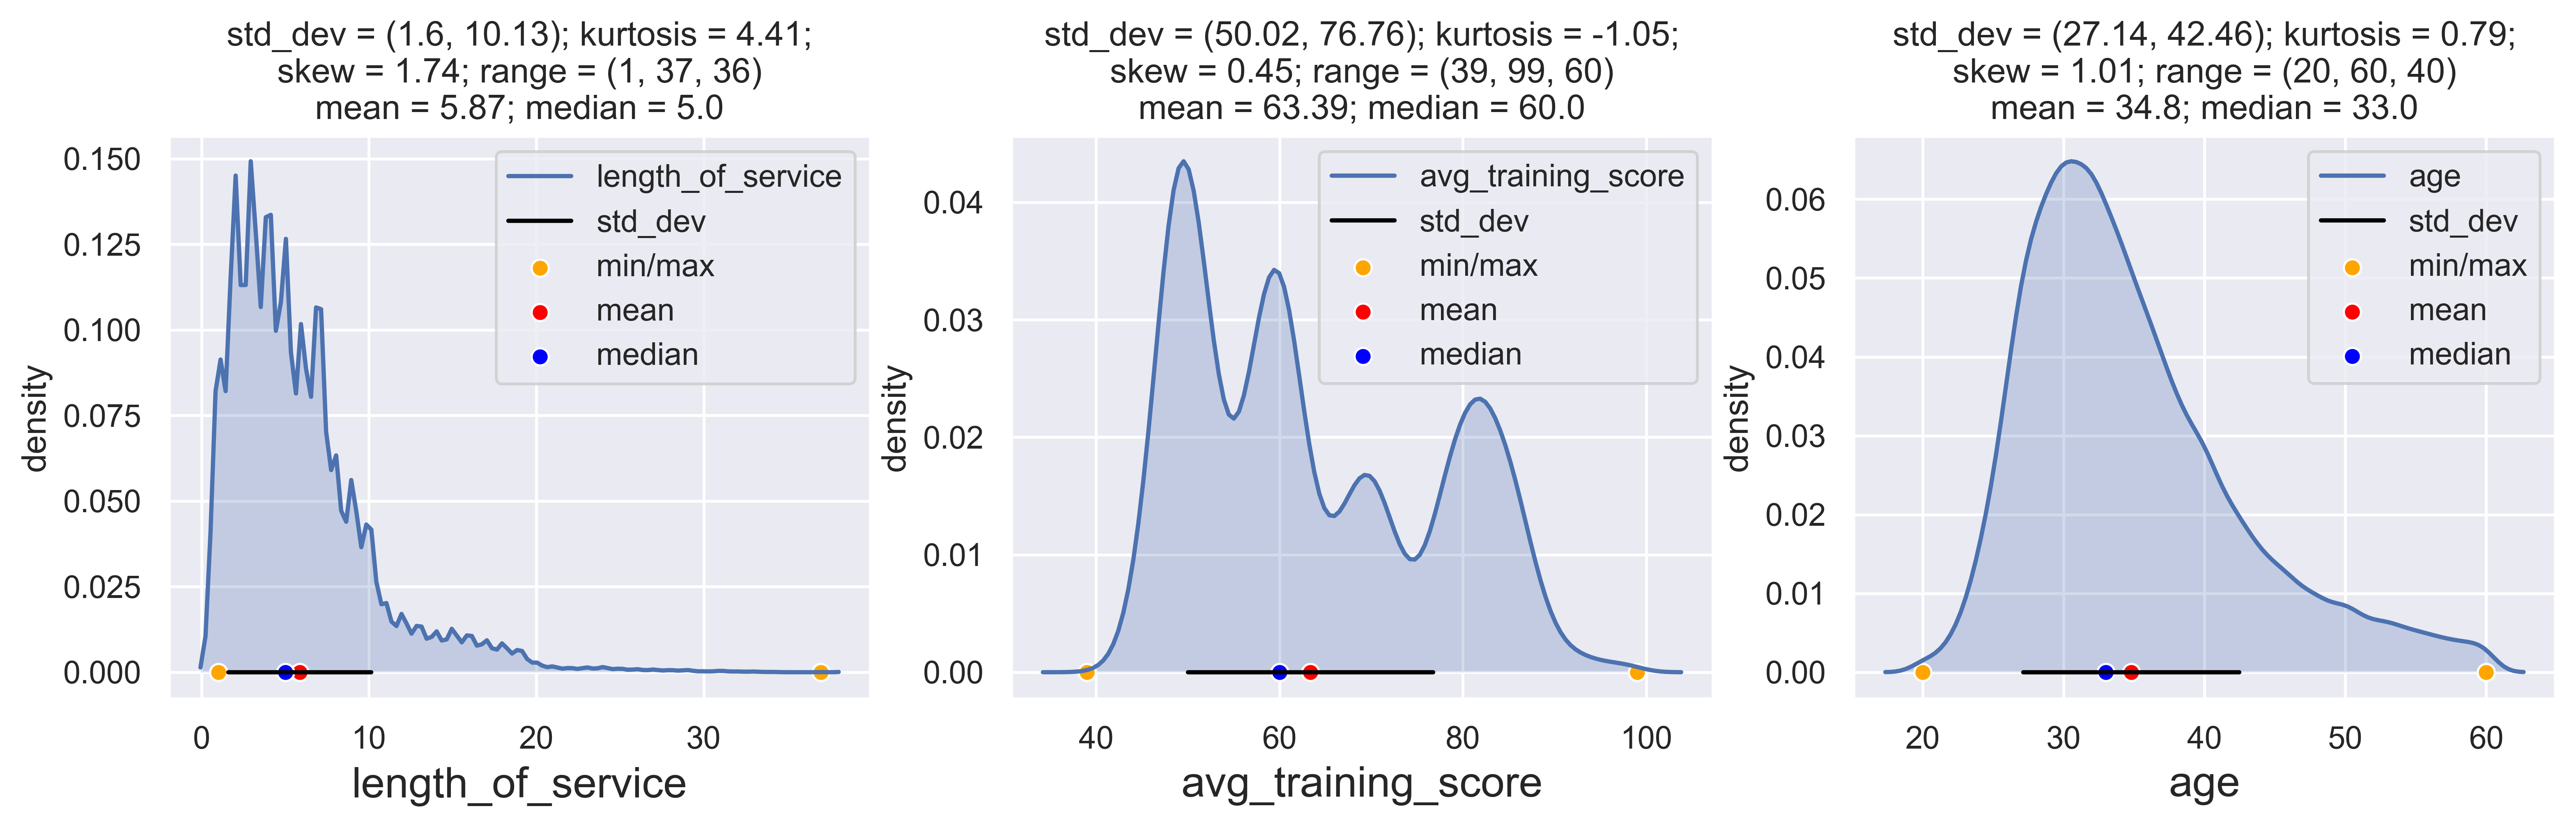

In [13]:
UVA_numeric(df1,numerical)

### Observations:

- **length_of_service:**
    - **Mostly employees have 1  to 10 years of experience**
    - Median length_of_service = 5 years
    - Skewness is 1.74 (right skewed): **length_of_service variable is significantly biased towards the employees with less experience**
    - **Kurtosis is 4.41**: Extreme values and outlier are very likely to be present
    

- **avg_training_score:**
    - **Mostly employees have avg training score from 50 to 76**
    - Median avg_training_score = 60
    - Skewness is 0.45 (right skewed): **avg_training_score is negligibly biased towards low scores**
    - **Kurtosis is -1.05**: Extreme values and outlier are not likely to be present
    

- **age:**
    - **Mostly employees have age from 27 years to 43 years**
    - Median age = 33
    - Skewness is 1.01 (right skewed): **age is significantly biased towards younger age**
    - **Kurtosis is 0.79**: Extreme values and outlier are likely to be present

---
# 7. Uni-variate Analysis : Categorical Variables
When dealing with categorical variables, we have to check their property like:

- Count/Fraction of values among different classes

In [14]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    rows=int(size/3) + 1
    plt.figure(figsize = (15,5*rows), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
        
        #Plotting the variable with every information
        plt.subplot(rows,3,j+1)
        sns.barplot(y=norm_count, x=norm_count.index , order = norm_count.index)
        plt.ylabel('fraction/percent', fontsize = 15)
        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.xticks(rotation=90)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
        plt.tight_layout()


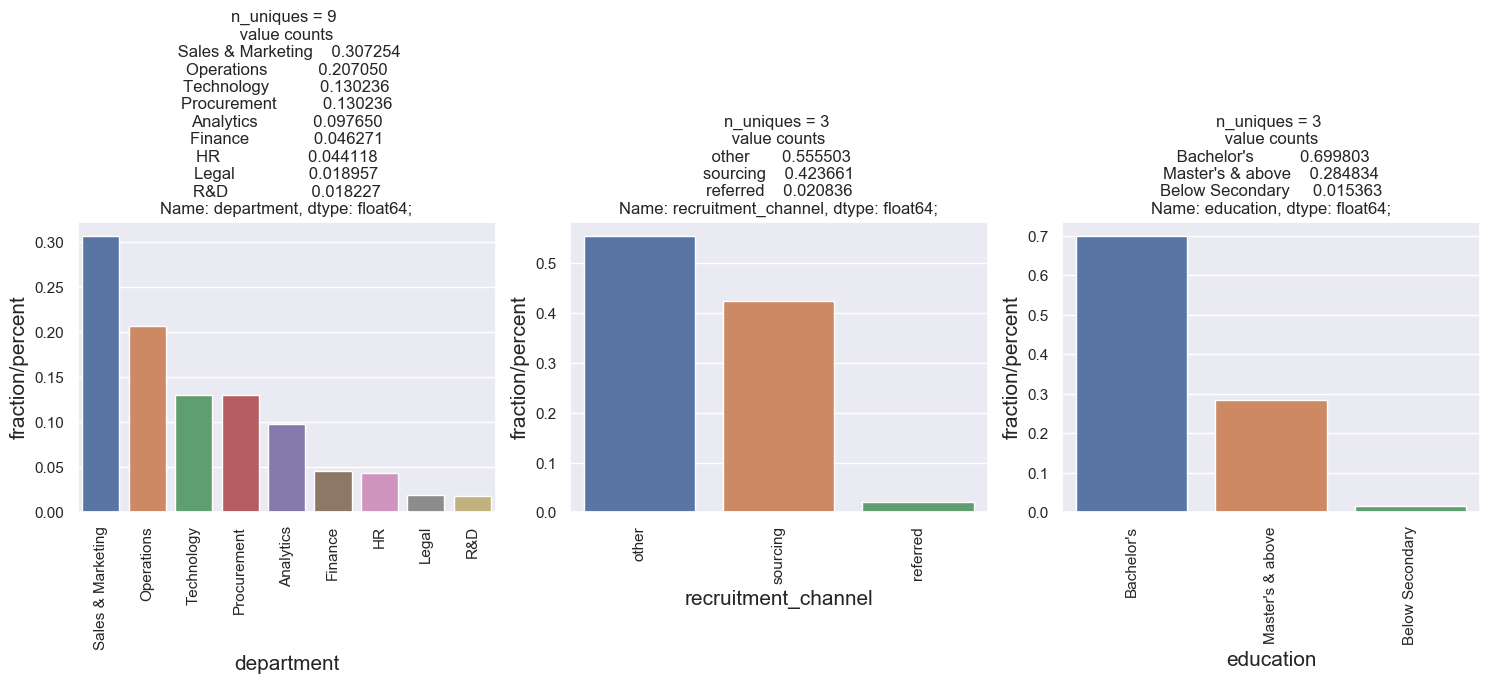

In [15]:
UVA_category(df1,categorical[1:4])

### Observations:
- **department:**
    - Maximum number of employees work in Sales and Marketing folowed by Operations and least number of employees work in Legal and R&D
    
    
- **recruitment_channel:**
    - Most of the employees are reffered by others and sourcing, we have very small portion of employees who are being reffered by existing employees


- **education:**
    - Most of the employees have Bechlor's degree and some have Master's degree and above. Few employees have education below Secondary level.

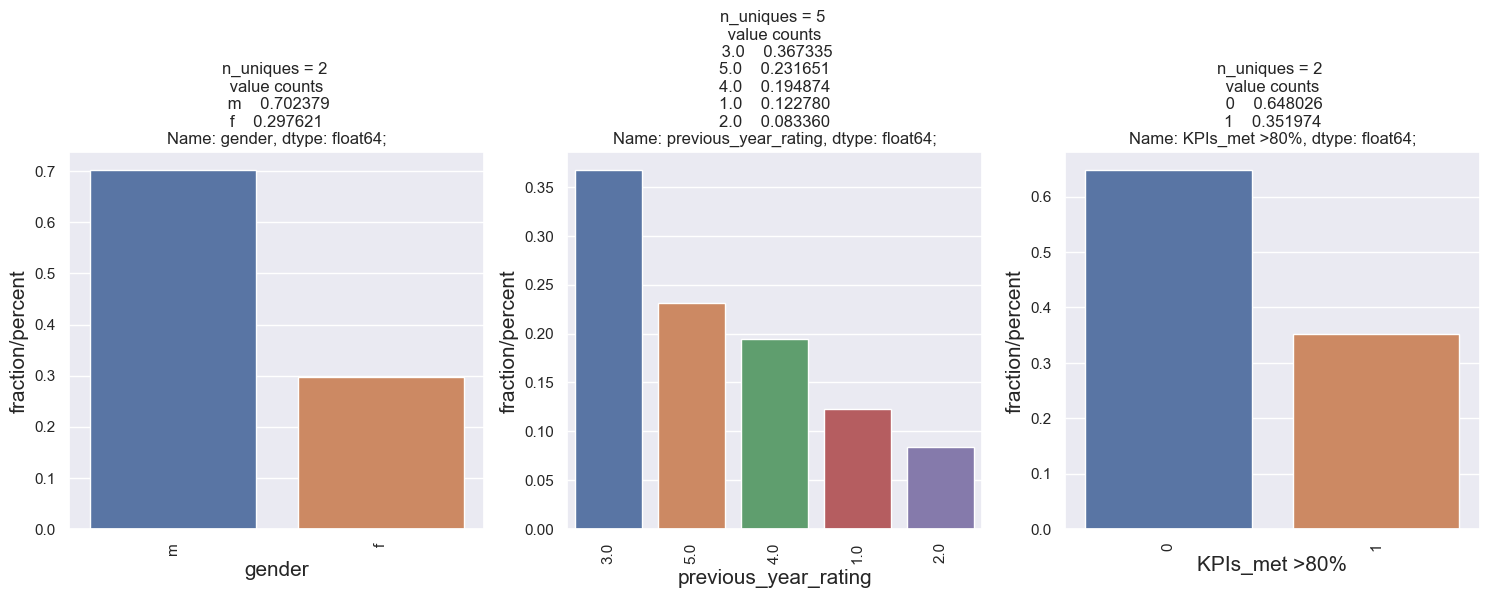

In [16]:
UVA_category(df1,categorical[4:7])

### Observations:
- **gender:**
    - Male employees are twice as much female employees.


- **previous_year_rating:**
    - Most pf the employees got averge rating (3.0) and there are more employees whoes rating is more than average as compared to number of employees having rating below average.


- **KPI_mey >80%:**
    - Number of employees whoes KPI > 80% is approx. half of the employees who didn't met that criteria.

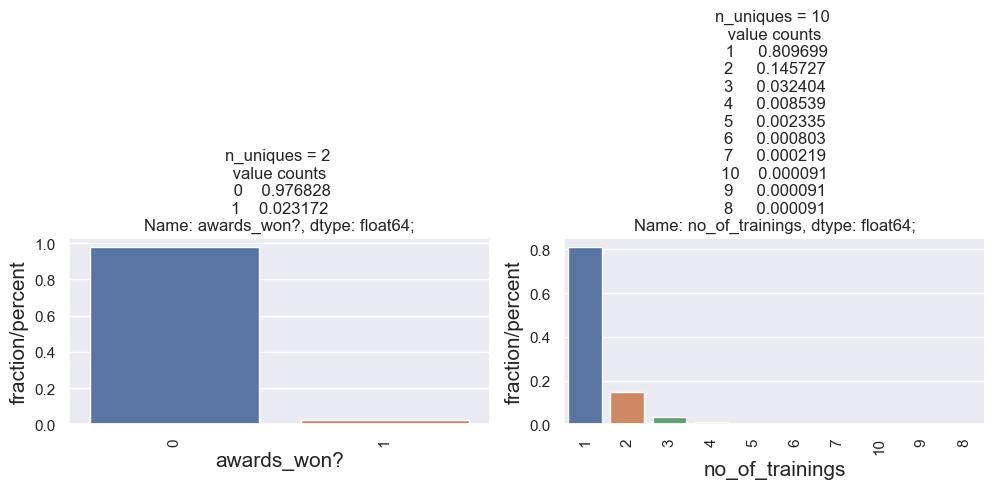

In [17]:
UVA_category(df1,categorical[7:])

### Observations:
- **awards_won?:**
    - Only 2.3% of total employees have got award.


- **no_of_trainings:**
    - Most of the employees have completed only one training. As the number of tarining increases the number of employees completing them drops exponentially.

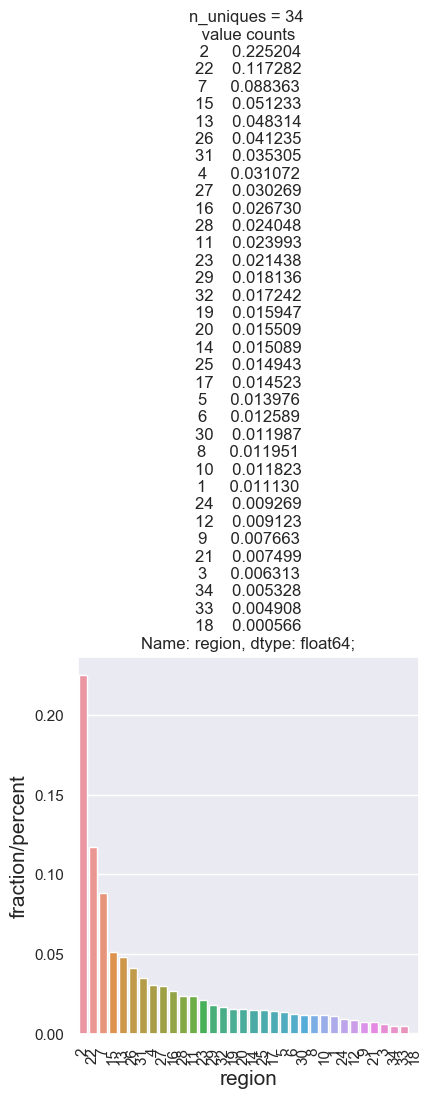

In [18]:
UVA_category(df1,["region"])

#### Observations:

- There are huge number of employees woring in region 2 followed by region 22 and 7.
- We will see in Bi-variate analysis whether more percentage of employees are promoted for these regions.

---
# 8. Uni-variate Analysis : Missing Values

**Missing values in the data could be because of following reason:**

- Human Error
- Data was already unavailable

In [19]:
round(df1.isnull().sum()/len(df1)*100,2)

department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

### Observations:

- 4.4% and 7.5% of the data is missing for education and previous_year_rating respectively.
- After Bi-variate analysis we will decide how we have to deal with these missing values.

---
# 9. Uni-variate Analysis : Outliers

Let's do the univariate analysis for outlier (if any) for the numerical variables.

In [20]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    '''

    size = len(var_group)
    plt.figure(figsize = (5*size,4), dpi = 100)
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])
        if include_outlier == True:
            #Plotting the variable with every information
            plt.subplot(1,size,j+1)
            sns.boxplot(data[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'\
                      .format(round(IQR,2),round(med,2),(round(quant25,2),round(quant75,2)),(outlier_low,outlier_high)))

        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high+1
            data2[i][data2[i]<whis_low] = whis_low-1

            # plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data2[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'\
                      .format(round(IQR,2),round(med,2),(round(quant25,2),round(quant75,2)),(outlier_low,outlier_high)))

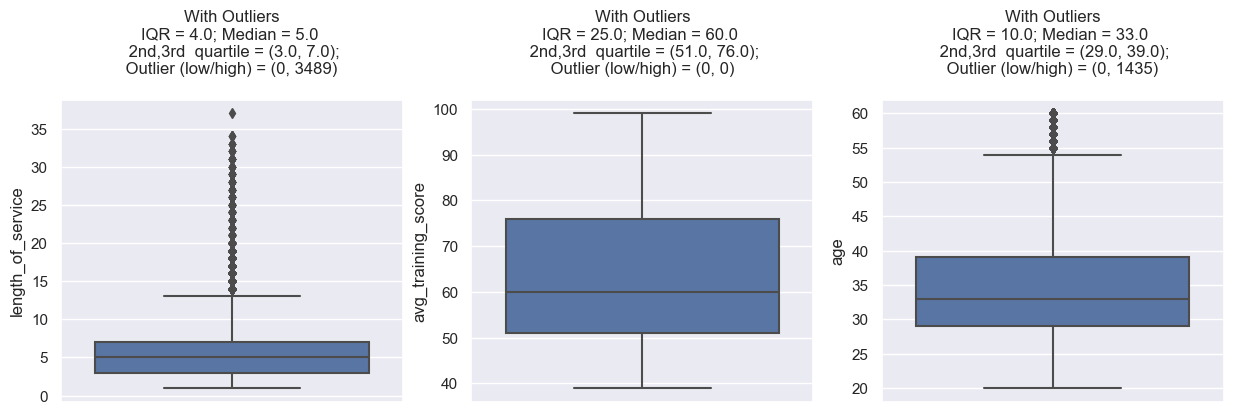

In [21]:
UVA_outlier(df1,numerical)

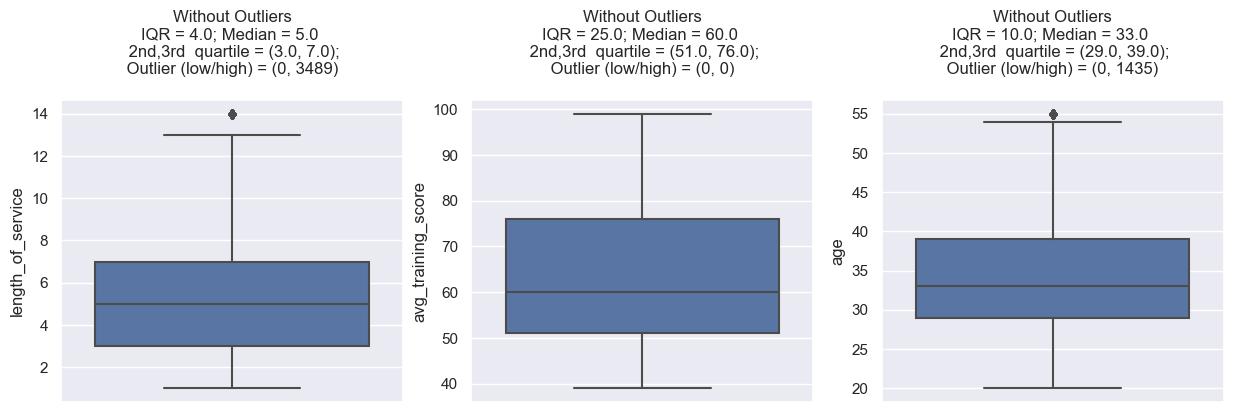

In [22]:
UVA_outlier(df1,numerical,False)

### Observations:

- We can see **approx 6% and 2%** of the values in **length_of_service and age** respectively are outliers.
- It is quite obvious that **employees with more service length are likely to be more older** and that is why outliers are present in both of them and we can see similar plots (after excluding outliers). 
- The number is not significantly large, we will decide to drop them or not after doing some further analysis only.

---
# 10. Summary of Uni-variate Analysis

### <font color = green>Insights:</font>
1. Mostly employees have length of service <= 10 years
2. Median age of employees is 33 years
3. Number of male employees are twice of female employees
4. 1/3rd of the employees met KPI > 80%
5. Only 2% employees got an award
6. 80% of the employees completed one training only
7. Few regions have high proportion of employees

### <font color = orange>Investigation directions (for bi-variate analysis):</font>
Below are some new hypothesis which we will test along with the previously generated hypothesis.
- Is there a significant difference in the age of the employees who got promoted v/s who didn't?
2. Does employees whose KPI > 80% have different promotion rate as compared to employees who don't?
3. Does male employees have different promotion rate as compared to female employees?
4. Promotion rate varies accross different regions?
---

# <font color = blue> Bi-variate Analysis </font>

In Bi-variate analysis we analyse two variable at a time and we try to understand the relationship among them. You can click here to [read more](https://en.wikipedia.org/wiki/Bivariate_analysis)

We can do different type of Bi-variate analysis like
1. Categorical - Categorical
2. Categorical - Numerical
3. Numerical - Numerical

# 11. Bi-variate Analysis: Categorical - Categorical

In this type of analysis both of the variables are of categeory type. In this we are going to study the relationship between independent variables (category type) with target variable `is_promoted` which is also categorical.

To test the hypothesis in this, we use:
- Chi-Square Test

In [23]:
def BVA_categorical_plot(data, tar, cat,sig_level = 0.05):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat],)
    f_obs = np.array([table.iloc[0][:].values,table.iloc[1][:].values])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(f_obs)
  
    #checking whether results are significant
    if p<sig_level:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    plt.figure(figsize=(20,4))
    fig, axes = plt.subplots(1,2)
    ax1 = data.groupby(cat)[tar].value_counts(normalize=False).unstack().round(4)
    sns.countplot(x=cat, hue=tar, data=data, ax = axes[0])
    axes[0].set_xticklabels(data[cat].cat.categories,rotation=90)
    axes[0].title.set_text("p-value = {}\n Significance level: {}\n difference significant? = {}\n\n{}".format(round(p,8),\
                                                                                                        sig_level,sig,str(ax1)))
    
    #plotting percent stacked bar plot
    ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack().round(4)
    ax1.plot(kind='bar', stacked='True',title=str(ax1),ax= axes[1], figsize=(15,5))
    plt.xticks(rotation=90)
    plt.ylabel("Percentage")
    #int_level = data[cat].value_counts()
    

In [24]:
def Grouping_Data(data,var,val):
    '''
    It takes the data, varible, and the list of categories we want to group together in that variable
    It return the data frame in which the desired categories in the given column are named as 'Group 1' and rest all other 
    categories in that column named as 'Rest'
    '''
    data2 = data.copy()
    data2[var] = data2[var].apply(lambda x: "Group 1" if x in val else "Rest")
    data2[var] = data2[var].astype("category")
    return data2

<font color = blue> **Let's see how promotion rate varies accross different recruitment channels**

<Figure size 1440x288 with 0 Axes>

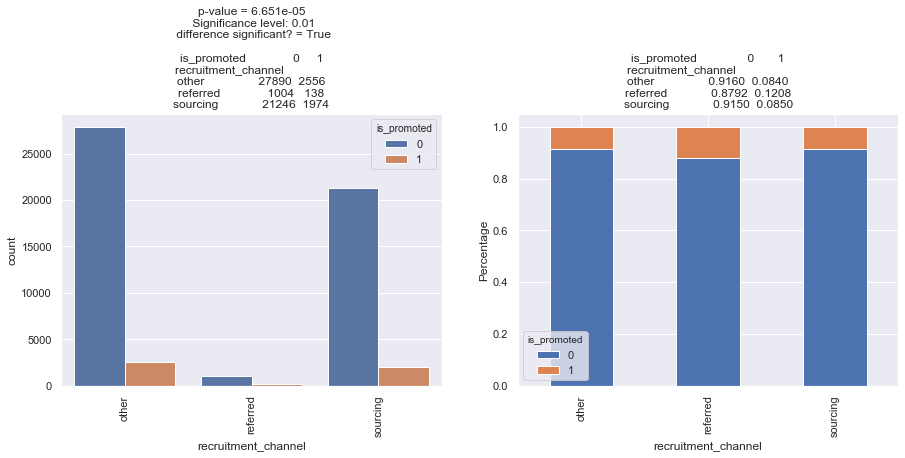

In [25]:
BVA_categorical_plot(df1,"is_promoted","recruitment_channel",0.01)

### Observations:
- Source of recruitment channel have significant impact on the promotion of the employees.
- Employees being recruited through refferals are 50% more likely to get promoted than other two ssources.

### <font color = red> Does employees joined through referral have significant difference in promotion rate as compared to other employees?

Group 1: ['referred']
Rest: ['other', 'sourcing']


<Figure size 1440x288 with 0 Axes>

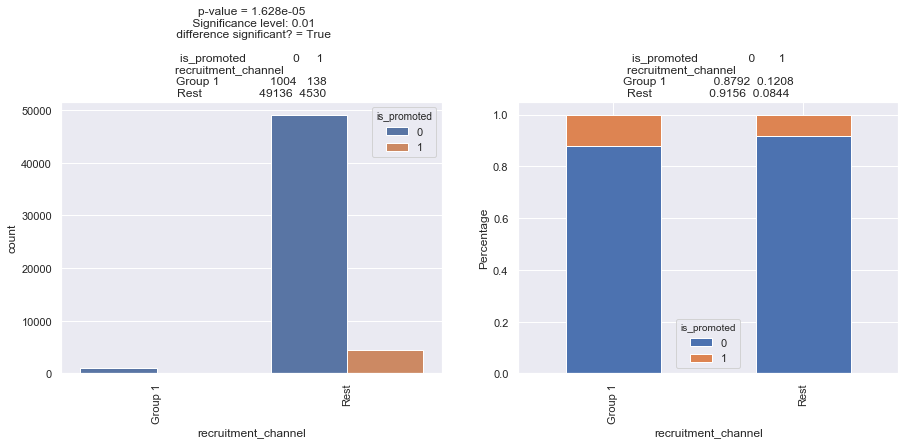

In [26]:
#we need to group certain categories together to test the hypothesis
gp1 = ["referred"]
rest = [x for x in df1["recruitment_channel"].cat.categories if x not in gp1]
print("Group 1: {}".format(gp1))
print("Rest: {}".format(rest))

df_new = Grouping_Data(df1,"recruitment_channel",gp1)
BVA_categorical_plot(df_new,"is_promoted","recruitment_channel",0.01)

### Observation:

- We can notice that there is a **significant difference** in the promotion rate for employees through referrals vs other recruitment channels.

- Employees through referrals are **50% more likely** to get promoted than other employees.

- Beside having only few proportion of employees through referrals, they are more likely to get promoted. **This could mean that referred employees turns out to be good resource for the company.**

<font color = blue> **Let's see how promotion rate varies accross different departments**

<Figure size 1440x288 with 0 Axes>

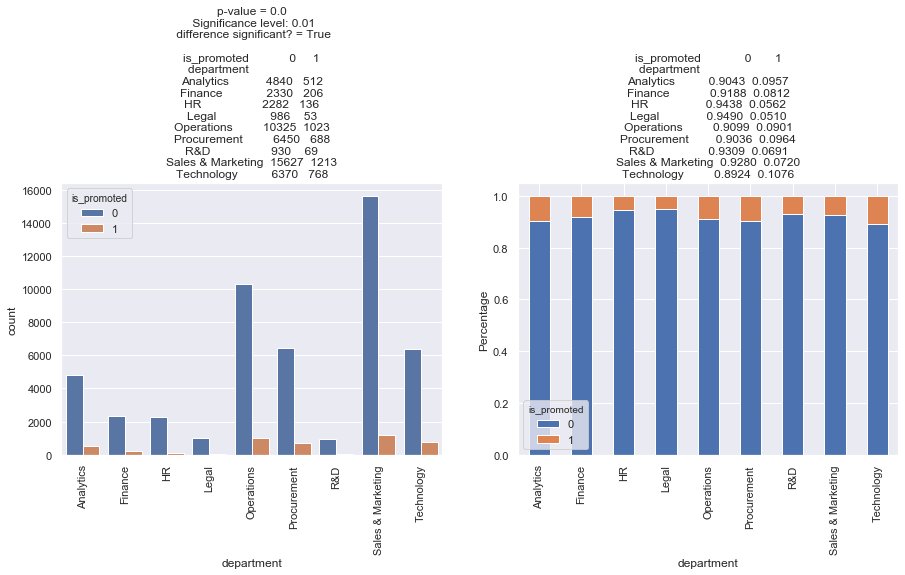

In [27]:
BVA_categorical_plot(df1,"is_promoted","department",0.01)

### Observations:
- Department have significant impact on the promotion of the employees.
- Employees working in departments (like Analytics, Procurement, Technology) have twice chances of getting promoted as compared to employees working in departments (like HR and Legal).

### <font color = red> Does employees of `Sales & Marketing ` department are more or less likely to get promoted as compared to other department employees?

Group 1: ['Sales & Marketing']
Rest: ['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement', 'R&D', 'Technology']


<Figure size 1440x288 with 0 Axes>

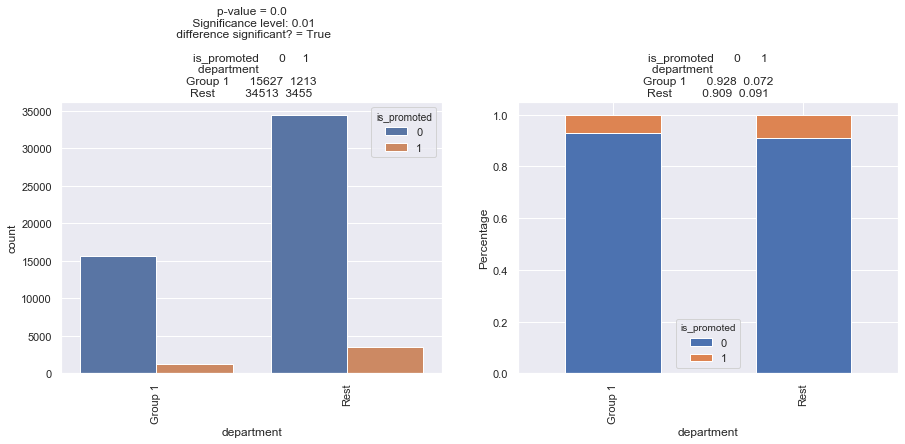

In [28]:
#we need to group certain categories together to test the hypothesis
gp1 = ["Sales & Marketing"]
rest = [x for x in df1["department"].cat.categories if x not in gp1]
print("Group 1: {}".format(gp1))
print("Rest: {}".format(rest))

df_new = Grouping_Data(df1,"department",gp1)
BVA_categorical_plot(df_new,"is_promoted","department",0.01)

### Observations:

- There is a **significant difference** in promotion rate for employees working in `Sales & Marketing` vs other department employees

- Beside having **higest number of employees** working in `Sales & Marketing` as compared to other departments, **promotion rate is still 2% less than weighted average of other departments.**

<font color = blue> **Let's see how promotion rate varies accross different regions**

<Figure size 1440x288 with 0 Axes>

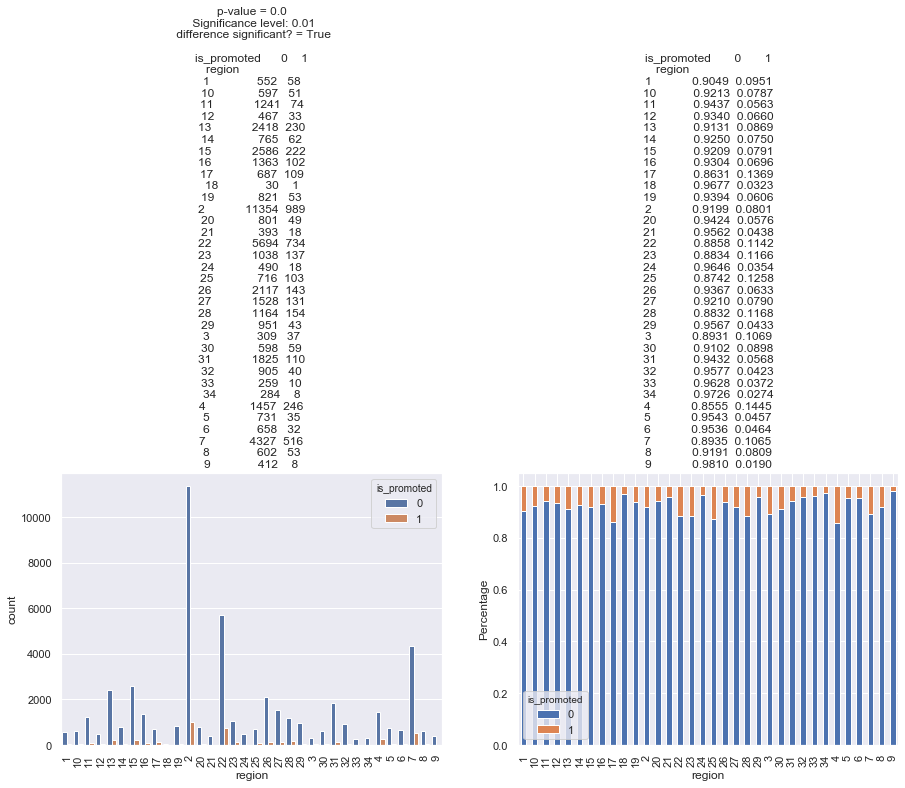

In [29]:
BVA_categorical_plot(df1,"is_promoted","region",.01)

### Observations:
- **Promotion rate significantly varies accross all region.**
- We can observe that some departments (like 4, 17, 22, 23, 25, 28, etc.) have good promotion rate of >= 10% while some regions (like 9, 18, 24, 34, etc.) have < 4% rate.

<font color = blue>  **Let's see how promotion rate varies accross different education level**

<Figure size 1440x288 with 0 Axes>

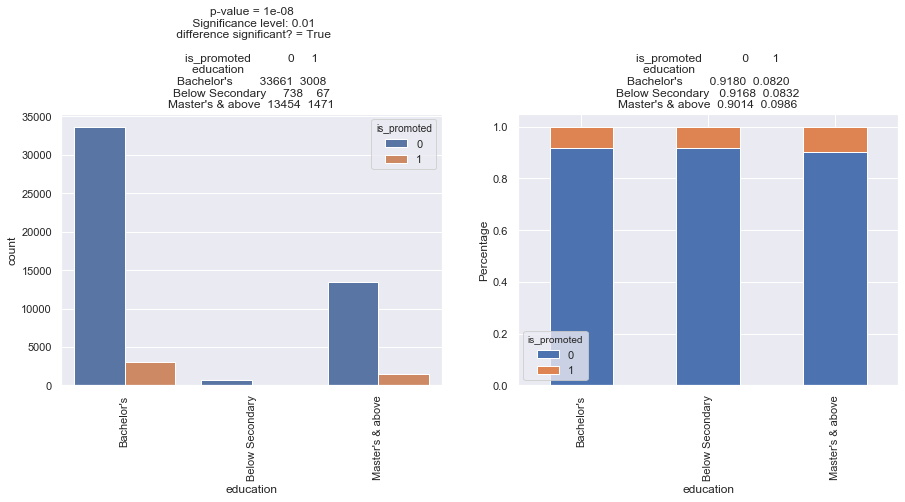

In [30]:
BVA_categorical_plot(df1,"is_promoted","education",.01)

### Observations:

- The test tell that there is **significant difference** in promotion rates accross different levels

- However, there **does not seems to be significant difference**

###  <font color = red> Does employees with `Master's & above` education level have different promotion rate as compared to other eductional background?

Group 1: ["Master's & above"]
Group 2: ["Bachelor's", 'Below Secondary']


<Figure size 1440x288 with 0 Axes>

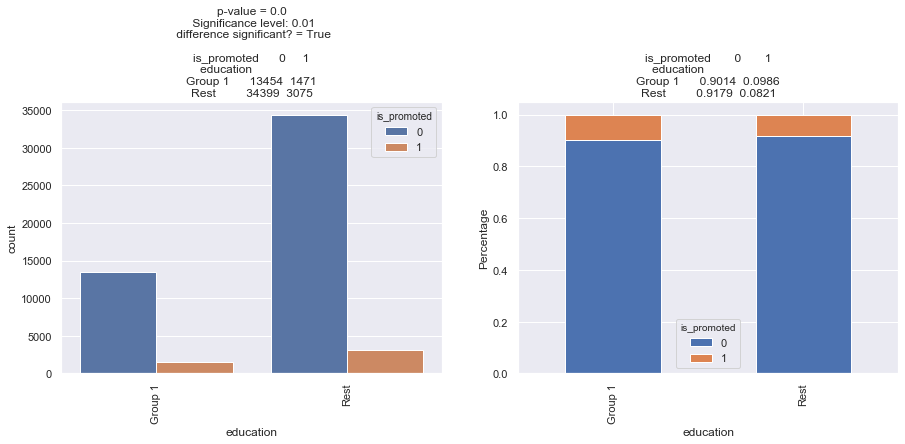

In [31]:
gp1 = ["Master's & above"]
gp2 = [x for x in df1.education.cat.categories if x not in gp1]
print("Group 1: {}".format(gp1))
print("Group 2: {}".format(gp2))

df_new = Grouping_Data(df1,"education",gp1)
BVA_categorical_plot(df_new,"is_promoted","education",.01)

### Observations:
- We can see, test shows, there is **significant difference** in promotion rate for employees with Master's & above vs not.

- Since the number of employees having eduction below secondary level are very less and the promotion is almost same as compared to employees with Bechlor's degree, we can merge them to a single category.

### <font color = red> Does male employees have different promotion rate as compared to female employees?

<Figure size 1440x288 with 0 Axes>

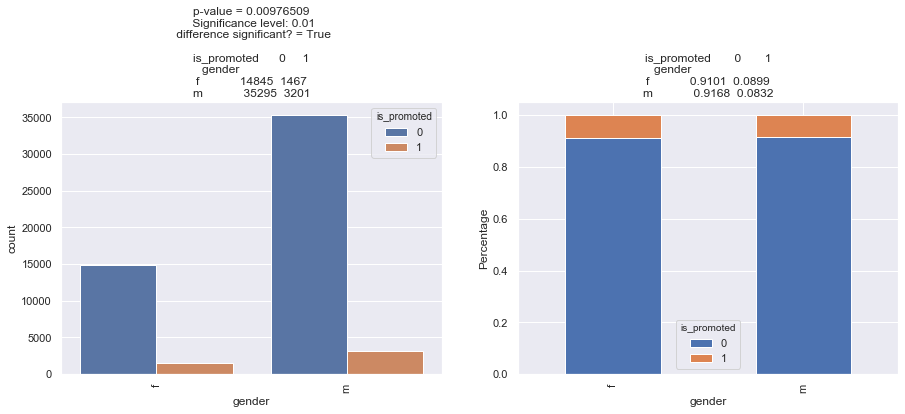

In [32]:
BVA_categorical_plot(df1,"is_promoted","gender",.01)

### Observations:
- Test shows that there is a **significant difference** in the promotion rate for male employees vs female employees.

- We can see that **female employees are little more likely to get promoted than male employees but the difference does not seems to be significant**.

### <font color = red> Does employees whose KPI > 80% have different promotion rate as compared to employees who don't?

<Figure size 1440x288 with 0 Axes>

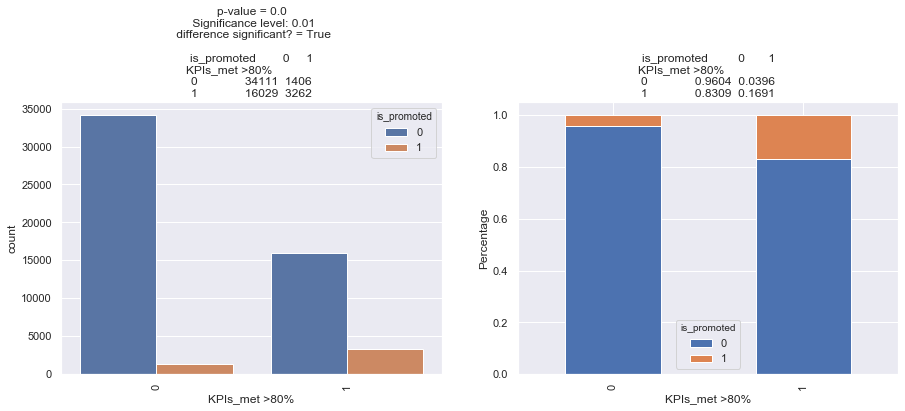

In [33]:
BVA_categorical_plot(df1,"is_promoted","KPIs_met >80%",.01)

### Observations:
- The test shows that there is a **significant difference** in the promotion rate for employees who met KPI > 80%  vs who didn't.

- **Employees who met KPI > 80% are 4 time more likely to get promoted than other employees.**

- This tells us that meeting KPI is strong factor for getting promoted.

- Also, we can notice that about 1/3 of the employees met the KPI > 80%.

### <font color = red> Does employees who won at least one award have different promotion rate as compared to employees who didn't?

<Figure size 1440x288 with 0 Axes>

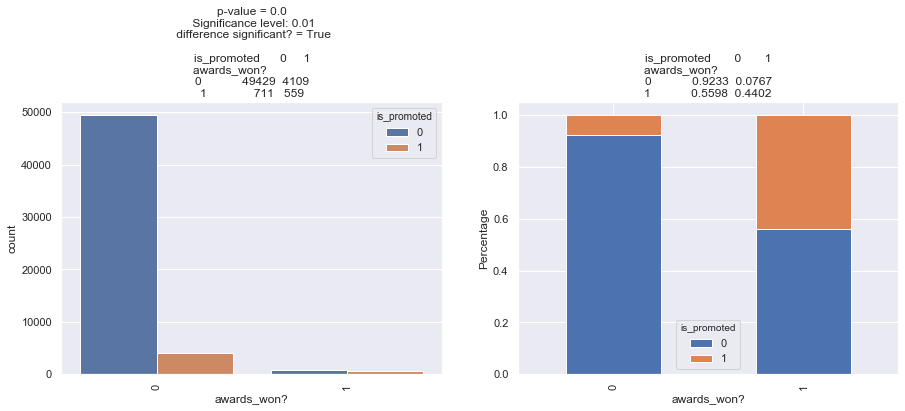

In [34]:
BVA_categorical_plot(df1,"is_promoted","awards_won?",0.01)

### Observations:
- The testbshows that there is a **significant difference** in the promotion rate for the employees who won at least one award vs who didn't recieved any.

- We can see that **employees who won award are 6 time more likely to get promoted than those who didn't.**

- Beside **only 2% of the employees got award**, still promotion rate is high as compared to who didn't recieved award. This tells us that wining an award has very strong impact on getting promoted.

<font color = blue> **Let's see how promotion rate varies accross previous year rating**

<Figure size 1440x288 with 0 Axes>

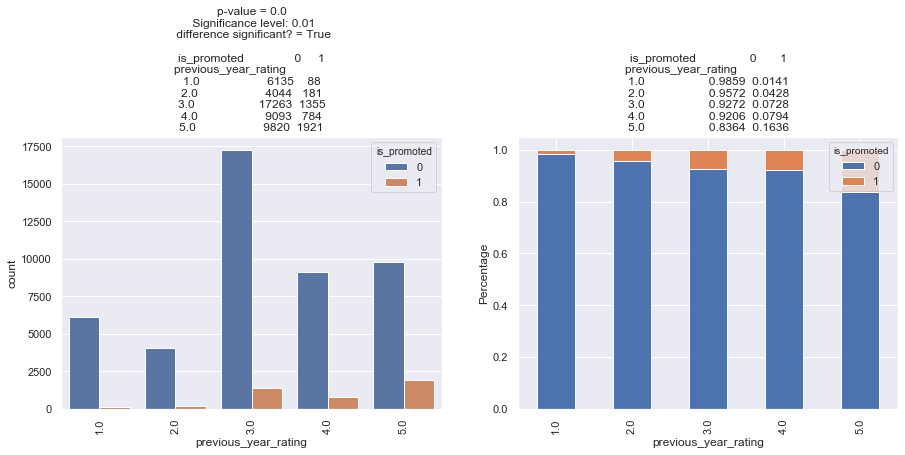

In [35]:
BVA_categorical_plot(df1,"is_promoted","previous_year_rating",0.01)

### Observations:
- The test shows that there is a **significant difference** in the promotion rate accross previous year rating.

-  We can see that as the **rating increases the promotion rate also increases.**

- Promotion rate for employees with raitng = 5 is **twice** as compared to employees with rating = 4.

### <font color = red> Does employees whose `previous_year_rating` is above average (i.e. 3)  have different promotion rate as compared to other employees?

Group 1: [4.0, 5.0]
Rest: [1.0, 2.0, 3.0]


<Figure size 1440x288 with 0 Axes>

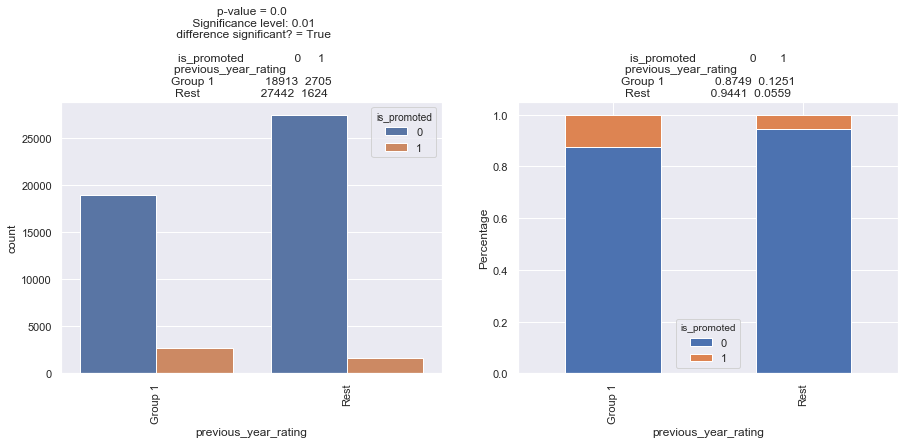

In [36]:
#we need to group certain categories together to test the hypothesis
gp1 = [4.0,5.0]
rest = [x for x in df1["previous_year_rating"].cat.categories if x not in gp1]
print("Group 1: {}".format(gp1))
print("Rest: {}".format(rest))

df_new = Grouping_Data(df1,"previous_year_rating",gp1)
BVA_categorical_plot(df_new,"is_promoted","previous_year_rating",0.01)

### Observations:
- The test shows that there is a **significant difference** in the promotion rate for employee with rating > 3 vs employees with rating <= 3.

- Employees with rating > 3 are **2.5 times more likely** to get promoted as compared to other employees.

- All this shows that employees raiting is a strong factor for promotion. **Higher rating, more the chances of promotion.**

<font color = blue> **Let's see how promotion rate varies accross number of trainings completed**

<Figure size 1440x288 with 0 Axes>

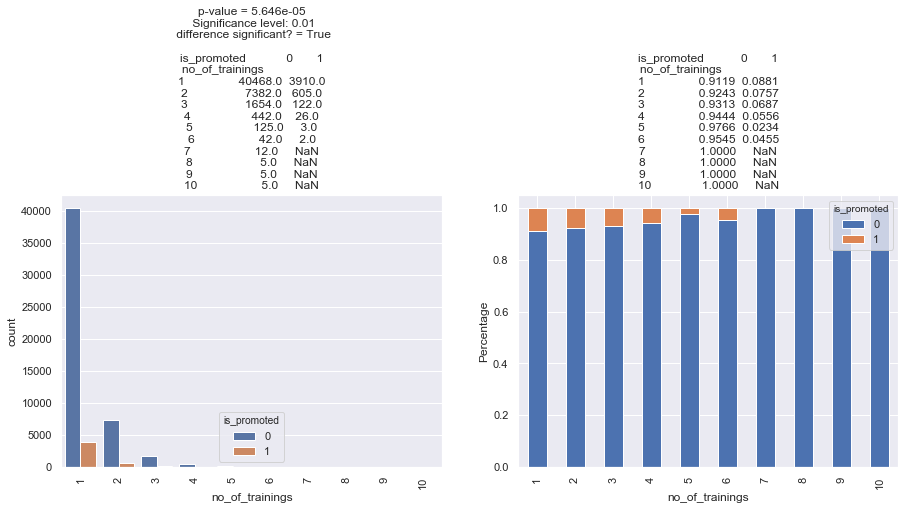

In [37]:
BVA_categorical_plot(df1,"is_promoted","no_of_trainings",0.01)

### Observations:

- The test shows that there is a **significant difference** in the promotion rate accross the number of trainings completed.

- To my surprise, **the promotion rate tends to decrease as the number of training tends to increase.**

- **No employee got promoted with numbers of training completed >= 7.** Though the total number of employees completed >= 7 traning are **27 only**.

- This leads us to bin the employees according to number of trainings completed. Like 1, 2, 3 & above

****
# 12. Bi-variate Analysis:  Numerical - Categorical

In this type of analysis one varriable is numerical and another is of categeory type. In this we are going to study the relationship between independent variables (category type) with target variable `is_promoted` which is a categorical variable.

To test the hypothesis in this, we use:
- Two Sample Z-Test
- Two Sample T-Test

In [38]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval

In [39]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
    '''
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    return pval

In [40]:
def Bivariate_cont_cat(data, cont, cat, category,sig_level = 0.05):
    #creating 2 samples
    x1 = data[cont][data[cat]==category][:]
    x2 = data[cont][~(data[cat]==category)][:]

    #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.mean()

    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #checking whether results are significant
    if z_p_val < sig_level:
        sig = True
    else:
        sig = False
    
    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

    #plotting
    plt.figure(figsize = (15,4), dpi=140)
    
    #barplot
    plt.subplot(1,3,1)
    sns.barplot(['not {}'.format(category),str(category)], [m2, m1])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n Significance level: {} \ndifference significant? = {}\n {}'\
              .format(round(t_p_val,6), round(z_p_val,6),sig_level,sig,table))

    # category-wise distribution
    plt.subplot(1,3,2)
    sns.kdeplot(x1, shade= True, color='orange', label = 'promoted')
    sns.kdeplot(x2, shade= False, color='blue', label = 'not promoted', linewidth = 1)
    plt.title('categorical distribution')
    # boxplot
    plt.subplot(1,3,3)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')


### <font color = red> Is there a significant difference in the `age` of the employees who got promoted v/s who didn't?

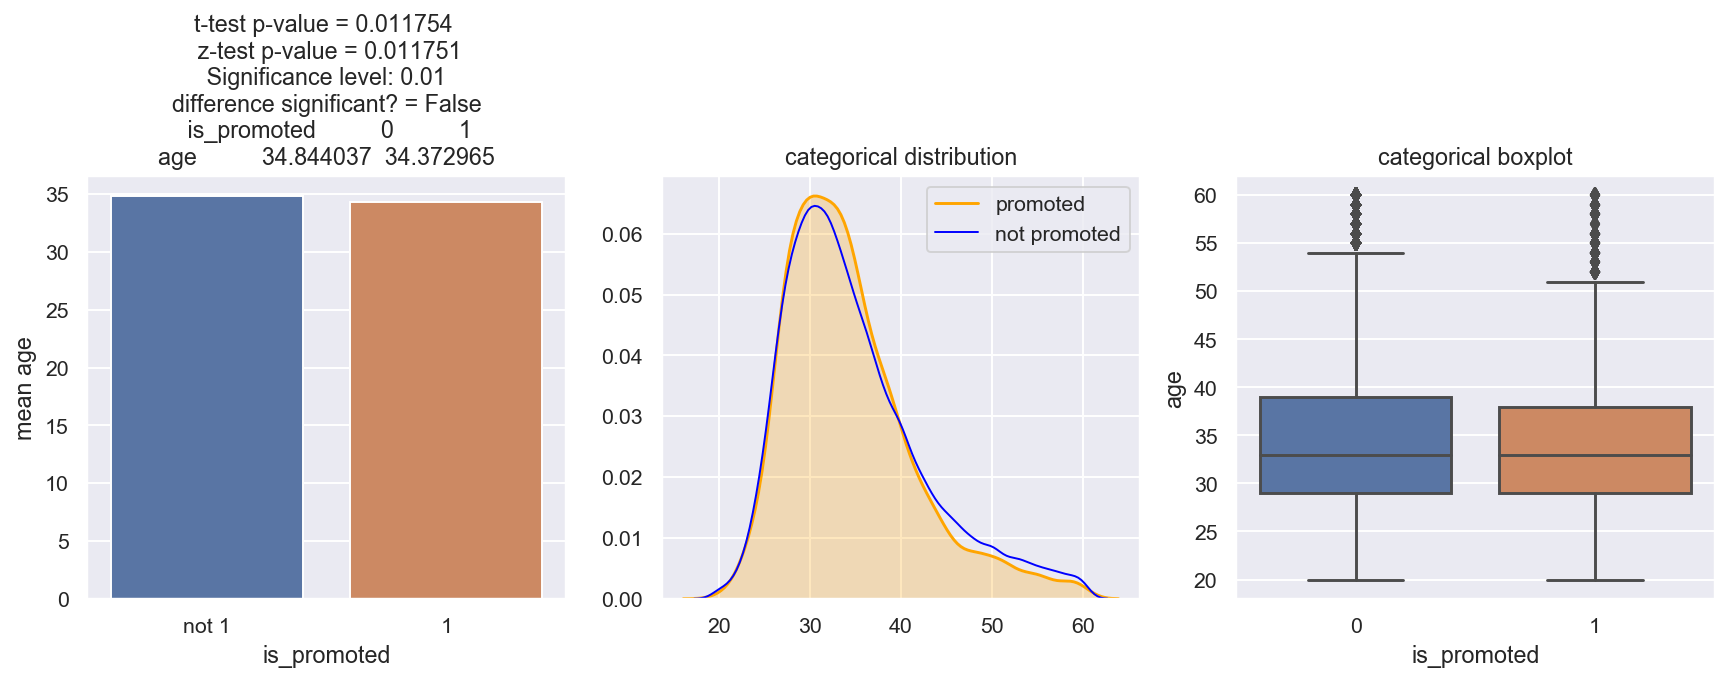

In [41]:
Bivariate_cont_cat(df1,"age","is_promoted",1,.01)

### Observations:

- The test shows that there is **no significant difference** in the age of the employees who got promoted v/s who didn't.

- From the distribution plot and box plot it is visible that the distribution of age for both category of employees is same (very similar).

- **Mean age of employees is 34.3 years** and there are some outliers present for both category of employees.

### <font color = red> Is there a significant difference in the `avg_training_score` of the employees who got promoted v/s who didn't?

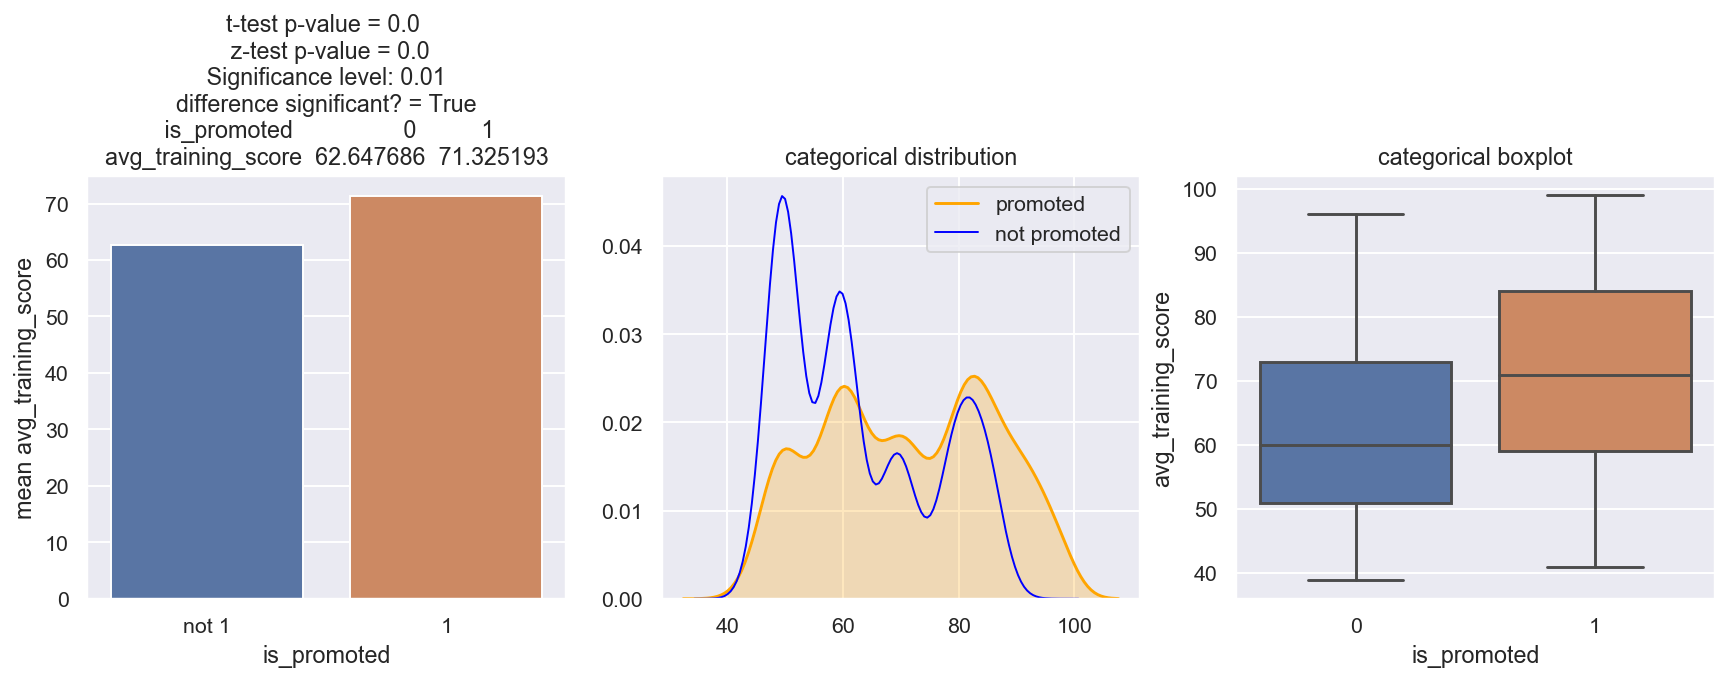

In [42]:
Bivariate_cont_cat(df1,"avg_training_score","is_promoted",1,.01)

### Observations:

- The test shows that there is **significant difference** in the avg_training_score of the employees who got promoted v/s who didn't.

- From the distribution plot and box plot it is visible that the **employees who got promoted have higher scores than the employees who didn't got promoted.**

- Mean avg_training_score of employees:
    - **Promoted: 74.3**
    - **Not Promoted: 62.7**
 

### <font color = red> Is there a significant difference in the `length_of_service` of the employees who got promoted v/s who didn't?

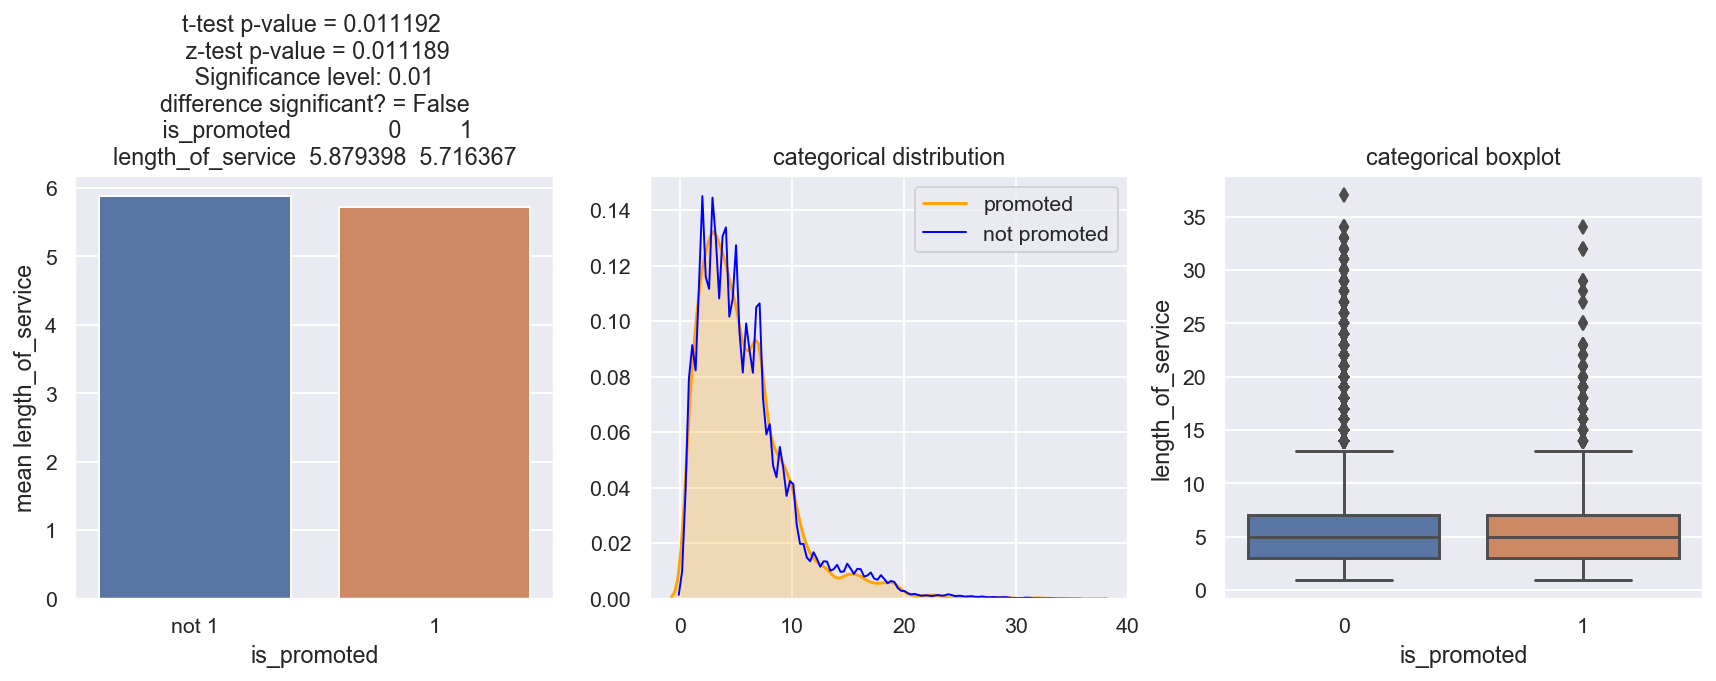

In [43]:
Bivariate_cont_cat(df1,"length_of_service","is_promoted",1,.01)

### Observations:

- The test shows that there is **no significant difference** in the length_of_service of the employees who got promoted v/s who didn't.

- From the distribution plot and box plot it is visible that the distribution of length_of_service for both category of employees is same (very similar).

- **Mean length_of_service of employees is 5.8 years** and there are some outliers present for both category of employees.

---
# 13. Bi-variate Analysis:  Missing Values

In this type of analysis we check how the target variable is distrbuted for the missing values.

In [44]:
def Bivariate_Missing_Values(data2,missing,tar):
    '''
    This methods plots the stacked barplot for the Null values v/s not Null values for the variables w.r.t. target variable
    
    It takes input a dataframe, list of variables having missing values, target variable
    '''
    data = data2.copy()
    fig, axes = plt.subplots(1,len(missing))
    for i,val in enumerate(missing):
        data[val] = data[val].astype("object")
        data[val] = data[val].apply(lambda x: "Null" if pd.isnull(x) else "Not Null")
        
        ax1 = data.groupby(val)[tar].value_counts(normalize=True).unstack().round(4)
        ax1.plot(kind = "bar",stacked = True, figsize = (15,4), ax = axes[i])
        axes[i].set_ylabel("Percentage")
        axes[i].set_title("Null values: {}%\n {}".format(round(data[val].value_counts(normalize=True)[-1]*100,1),str(ax1)))
        

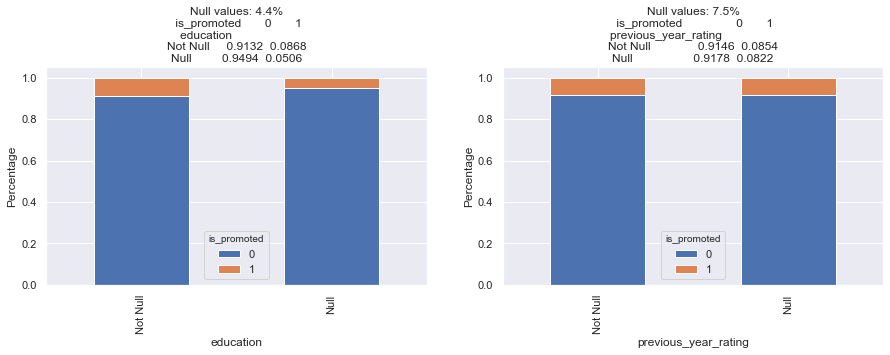

In [45]:
miss_var = ["education","previous_year_rating"]
Bivariate_Missing_Values(df1,miss_var,"is_promoted")

### Obervations:

- In education 4.4% of the values are NULL values and promotion rate is 5% for them whereas for non-Null values it is 8.7%.
- In previous_year_rating 7.5% of the values are NULL values and promotion rate is 8.2% for them whereas for non-Null values it is 8.5% i.e. similar.
- In data preprocessing step we will impute these values using some technique.

---
# 14. Summary of Bi-variate Analysis

### <font color = green>Insights:</font>
#### <font color = blue>Categorical - Categorical:</font>
1. Recruitment channel have significant impact on the promotion rate, **referred employees are 50% more likely to get promoted than other employee.**
2. Department have significant impact on the promotion rate, **promotion rate varies accross departments.**
3. Regions have significant impact on the promotion rate, **promotion rate varies accross regions.**
4. Education level does not have significant difference in the promotion rate. However, employees with Master's degree & above are more likly to get promoted than others.
5. Promotion rate is similar for gender, no significant difference.
6. KPI met has significant difference on the promotion rate, **employees who met KPI are 4 times more likely to get promoted than the employees who didn't met KPI.**
7. Awards won has significant difference on the promotion rate, **employees who won award are 6 times more likely to get promoted than the employees who didn't won award.**
8. Previous year ratings also have significant impact on the promotion rate, as the rating increases the promotion rate also increases. **Employees with rating more than average ratings are 2.5 time more likely to get promoted than others.**
9. Number of tranings also have significant impact on the promotion rate, **as the number of training increases the promotion rate decreases (quite surprising).**

#### <font color = blue>Numerical - Categorical:</font>
1. There is no significant difference in the age of employees who got promoted v/s who didn't.
2. There is significant difference in the training score of the employee who got promoted v/s who didn't. **Employees who got promoted have average score of 71 and other employees have 62.**
3. There is no significant difference in the lenght of service of employees who got promoted v/s who didn't.


### <font color = orange>Investigation directions:</font>
1. We need to perform preprocessing and feature engineering process.
2. We will create new features like binning some of the existing features:
    - recruitment channel
    - department - according to count, promotion rate
    - region -  according to count, promotion rate
    - education level
    - previous year rating - above avergae and below average
    - number of trainings
    - age groups
    - length of service
3. We will impute missing values using some techinque.
4. Perform EDA for the new features (if needed).

---

# 15. Feature Generation

In [46]:
df2 = df1.copy()

df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [47]:
#joining age = age - length_of_service
df2["joining_age"] = df2["age"] - df2 ["length_of_service"]

df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,joining_age
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,27
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,26
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,27
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,29
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,43


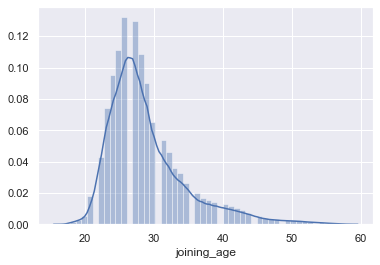

In [52]:
sns.distplot(df2["joining_age"])

In [51]:
df2.describe()

,age,length_of_service,avg_training_score,joining_age
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,34.803915,5.865512,63.386750,28.938403
std,7.660169,4.265094,13.371559,5.825101
min,20.000000,1.000000,39.000000,17.000000
25%,29.000000,3.000000,51.000000,25.000000
50%,33.000000,5.000000,60.000000,27.000000
75%,39.000000,7.000000,76.000000,31.000000
max,60.000000,37.000000,99.000000,58.000000


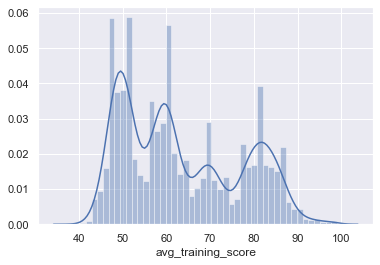

In [56]:
sns.distplot(df2["avg_training_score"],)

In [58]:
df2["traning_score_bins"] = pd.cut(x = df2["avg_training_score"], bins=[0,55,65,75,100], labels=["0 - 55","56 - 65","66 - 75","76 - 100"])

df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,joining_age,traning_score_bins
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,27,0 - 55
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,26,56 - 65
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,27,0 - 55
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,29,0 - 55
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,43,66 - 75


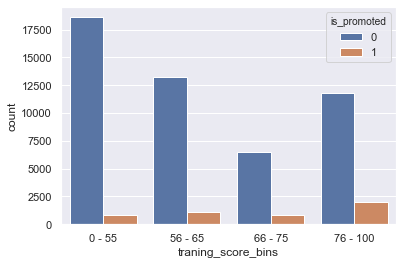

In [60]:
sns.countplot(df2["traning_score_bins"],hue=df2["is_promoted"])

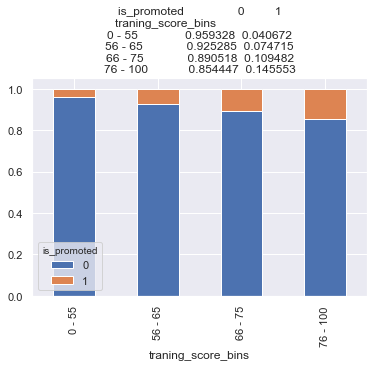

In [61]:
ax = df2.groupby("traning_score_bins")["is_promoted"].value_counts(normalize = True).unstack()
ax.plot(kind = "bar",stacked = True, title = str(ax))

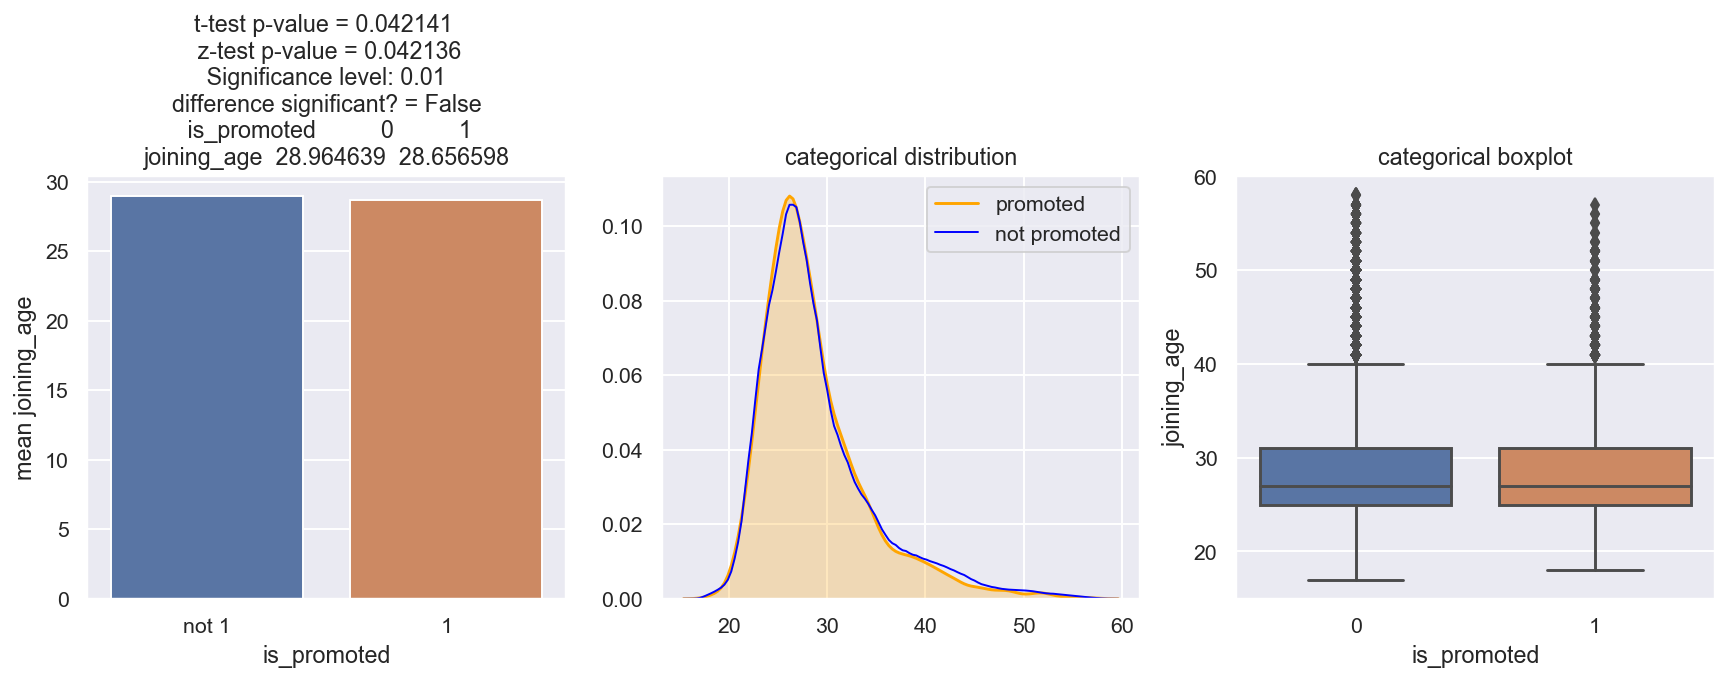

In [62]:
Bivariate_cont_cat(df2,"joining_age","is_promoted",1,0.01)

In [63]:
df2["los_bins"] = pd.cut(x = df2["length_of_service"], bins=[0,3,5,7,40], labels=["0 - 3","4 - 5","6 - 7","8 - 40"])

df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,joining_age,traning_score_bins,los_bins
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,27,0 - 55,8 - 40
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,26,56 - 65,4 - 5
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,27,0 - 55,6 - 7
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,29,0 - 55,8 - 40
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,43,66 - 75,0 - 3


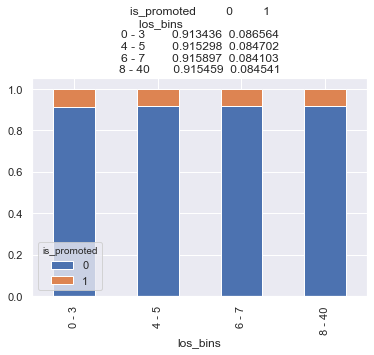

In [64]:
ax = df2.groupby("los_bins")["is_promoted"].value_counts(normalize = True).unstack()
ax.plot(kind = "bar",stacked = True, title = str(ax))

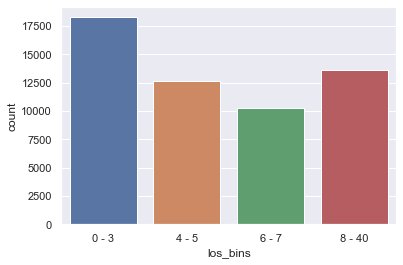

In [66]:
sns.countplot(df2["los_bins"])

In [73]:
df2["los_level_bins"] = pd.cut(x = df2["length_of_service"], bins=[0,5,10,40], labels=["0 - 5","6 - 10","11 - 40"])

df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,joining_age,traning_score_bins,los_bins,los_level_bins,7yrs&_below
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,27,0 - 55,8 - 40,6 - 10,0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,26,56 - 65,4 - 5,0 - 5,1
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,27,0 - 55,6 - 7,6 - 10,1
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,29,0 - 55,8 - 40,6 - 10,0
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,43,66 - 75,0 - 3,0 - 5,1


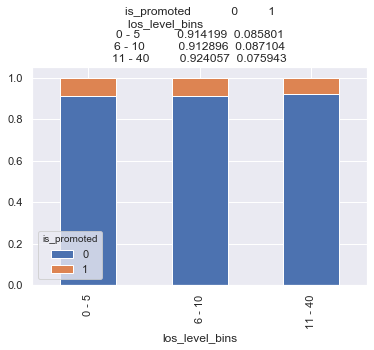

In [74]:
ax = df2.groupby("los_level_bins")["is_promoted"].value_counts(normalize = True).unstack()
ax.plot(kind = "bar",stacked = True, title = str(ax))

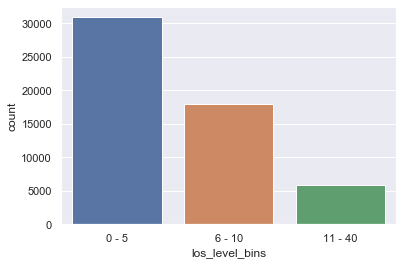

In [75]:
sns.countplot(df2["los_level_bins"])

In [70]:
df2["7yrs&_below"] = df2["length_of_service"].apply(lambda x: 1 if x<=7 else 0)

df2.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,joining_age,traning_score_bins,los_bins,los_level_bins,7yrs&_below
0,Sales & Marketing,7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,27,0 - 55,8 - 40,6 - 10,0
1,Operations,22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,26,56 - 65,4 - 5,3 - 5,1
2,Sales & Marketing,19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,27,0 - 55,6 - 7,6 - 10,1
3,Sales & Marketing,23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,29,0 - 55,8 - 40,6 - 10,0
4,Technology,26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,43,66 - 75,0 - 3,0 - 2,1


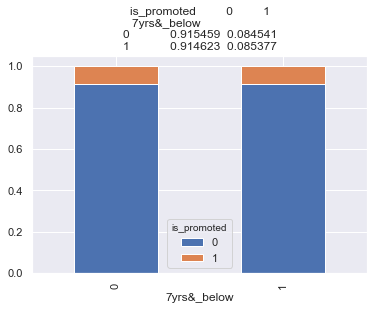

In [71]:
ax = df2.groupby("7yrs&_below")["is_promoted"].value_counts(normalize = True).unstack()
ax.plot(kind = "bar",stacked = True, title = str(ax))

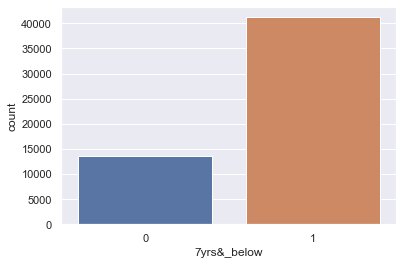

In [72]:
sns.countplot(df2["7yrs&_below"])

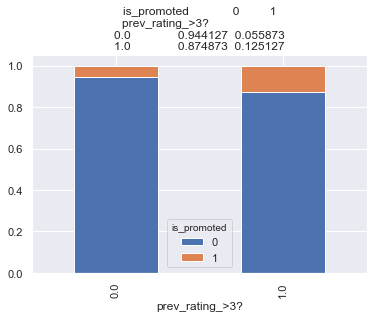

In [78]:
df2["prev_rating_>3?"] = df2["previous_year_rating"].apply(lambda x: 1 if x>3 else 0)

ax = df2.groupby("prev_rating_>3?")["is_promoted"].value_counts(normalize = True).unstack()
ax.plot(kind = "bar",stacked = True, title = str(ax))

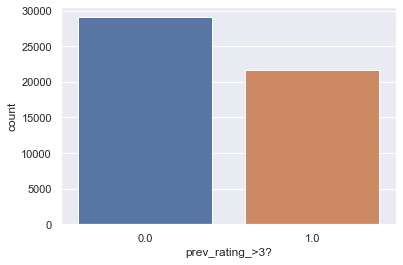

In [79]:

sns.countplot(df2["prev_rating_>3?"])

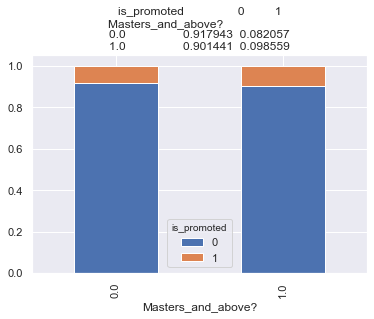

In [80]:
df2["Masters_and_above?"] = df2["education"].apply(lambda x: 1 if x == "Master's & above" else 0)

ax = df2.groupby("Masters_and_above?")["is_promoted"].value_counts(normalize = True).unstack()
ax.plot(kind = "bar",stacked = True, title = str(ax))

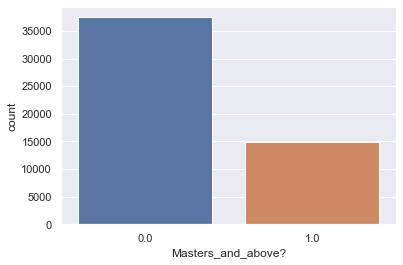

In [81]:
sns.countplot(df2["Masters_and_above?"])